# Working with Text Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Types of Data Represented as Strings

## Example Application: Sentiment Analysis of Movie Reviews

> Prenos podatkov s strani: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [1]:
!tree -dL 2 data/aclImdb

data/aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories


In [2]:
!rm -r data/aclImdb/train/unsup

rm: cannot remove 'data/aclImdb/train/unsup': No such file or directory


In [3]:
from sklearn.datasets import load_files

In [4]:
reviews_train = load_files("data/aclImdb/train/")

# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [8]:
print(f"Samples per class (training): {np.bincount(y_train)}")

Samples per class (training): [12500 12500]


In [9]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


## Representing Text Data as a Bag of Words

<img src="images/bag.png"></img>

### Applying Bag-of-Words to a Toy Dataset

In [10]:
bards_words =["The fool doth think he is wise,",
              "but the the wise man knows himself to be a fool"]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [12]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [13]:
bag_of_words = vect.transform(bards_words)

print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [14]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1]])

### Bag-of-Words for Movie Reviews

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

print(f"X_train:\n{repr(X_train)}")

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names_out()

print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Every 2000th feature:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=5, n_jobs=-1, verbose=1)
print(f"Mean cross-validation accuracy: {np.mean(scores):.2f}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean cross-validation accuracy: 0.88


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.8s finished


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


In [19]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


    "\b\w\w+\b"

In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)

print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [21]:
feature_names = vect.get_feature_names_out()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature:
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 't

In [22]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print(f"Best cross-validation score: {grid.best_score_:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best cross-validation score: 0.89


## Stopwords

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['get', 'most', 'in', 'never', 'something', 'seems', 'do', 'very', 'four', 'thick', 'if', 'thence', 'five', 'me', 'go', 'via', 'keep', 'everything', 'two', 'at', 'put', 'would', 'himself', 'some', 'anywhere', 'ten', 'inc', 'part', 'such', 'beside', 'few', 'all']


In [24]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)

X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [25]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print(f"Best cross-validation score: {grid.best_score_:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best cross-validation score: 0.88


## Rescaling the Data with tf–idf

    tfidf(w, d) = tf log((N + 1) / (Nw + 1)) + 1

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(max_iter=10000))

param_grid = {'logisticregression__C': [0.01, 0.1]}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(text_train, y_train)

print(f"Best cross-validation score: {grid.best_score_:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best cross-validation score: 0.89


In [27]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

# transform the training dataset
X_train = vectorizer.transform(text_train)

# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

print(f"Features with lowest tfidf:\n{feature_names[sorted_by_tfidf[:20]]}")
print(f"Features with highest tfidf: \n{feature_names[sorted_by_tfidf[-20:]]}")

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [28]:
sorted_by_idf = np.argsort(vectorizer.idf_)

print(f"Features with lowest idf:\n{feature_names[sorted_by_idf[:100]]}")

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## Investigating Model Coefficients

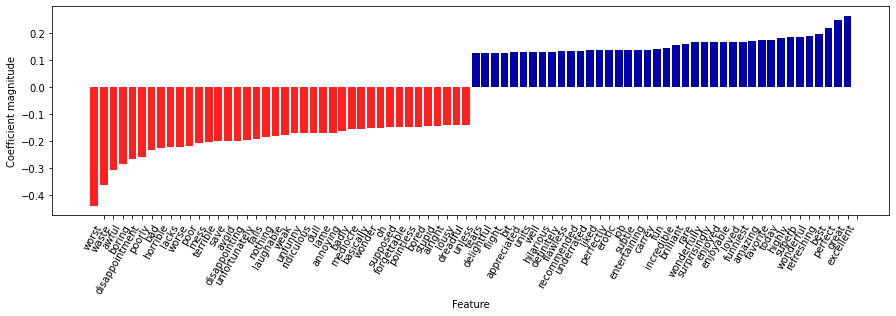

In [29]:
from helpers import tools

tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_, feature_names, n_top_features=40)

## Bag-of-Words with More Than One Word (n-Grams)

In [30]:
print(f"bards_words:\n{bards_words}")

bards_words:
['The fool doth think he is wise,', 'but the the wise man knows himself to be a fool']


In [31]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names_out()}")

Vocabulary size: 13
Vocabulary:
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [34]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names_out()}")

Vocabulary size: 15
Vocabulary:
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the the' 'the wise'
 'think he' 'to be' 'wise man']


In [38]:
cv = CountVectorizer(ngram_range=(3, 3)).fit(bards_words)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names_out()}")

Vocabulary size: 13
Vocabulary:
['but the the' 'doth think he' 'fool doth think' 'he is wise'
 'himself to be' 'knows himself to' 'man knows himself' 'the fool doth'
 'the the wise' 'the wise man' 'think he is' 'to be fool' 'wise man knows']


In [39]:
cv.transform(bards_words).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]])

In [40]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)

print(f"Vocabulary size: {len(cv.vocabulary_)}")
print(f"Vocabulary:\n{cv.get_feature_names_out()}")

Vocabulary size: 41
Vocabulary:
['be' 'be fool' 'but' 'but the' 'but the the' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the the'
 'the the wise' 'the wise' 'the wise man' 'think' 'think he' 'think he is'
 'to' 'to be' 'to be fool' 'wise' 'wise man' 'wise man knows']


In [41]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams

# lahko dodamo triagrame in biagrame samo predolgo traja
param_grid = {"logisticregression__C": [100], "tfidfvectorizer__ngram_range": [(1, 1), (1, 2)]}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(text_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 2)}


/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


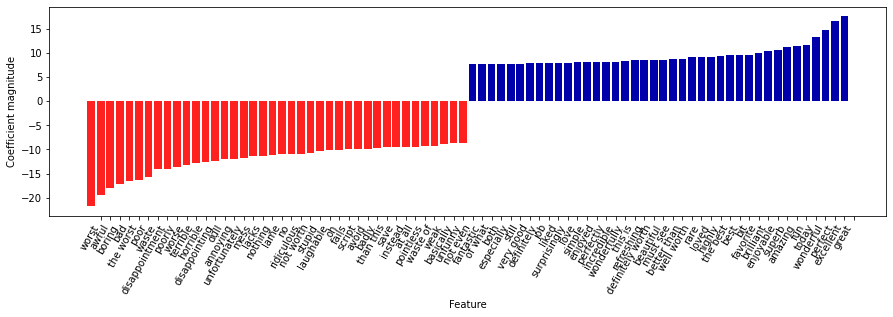

[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 1); total time=   8.5s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 2); total time=  27.1s


/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 1); total time=   8.3s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 2); total time=  28.6s


/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 1); total time=   7.5s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 1); total time=   8.1s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 2); total time=  22.5s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 1); total time=   7.4s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 2); total time=  21.5s
[CV] END logisticregression__C=100, tfidfvectorizer__ngram_range=(1, 2); total time=  20.2s


/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/icta/python-analitika-2-public/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [42]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']

feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
tools.visualize_coefficients(coef, feature_names, n_top_features=40)

## Advanced Tokenization, Stemming, and Lemmatization

In [44]:
import spacy
import nltk

In [45]:
# load spacy's English-language models
en_nlp = spacy.load("en_core_web_sm")
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [46]:
compare_normalization("Our meeting today was worse than yesterday, I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


## Topic Modeling and Document Clustering

### Latent Dirichlet Allocation

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")

# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=10000, max_df=.15)

X = vect.fit_transform(text_train)

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1)

# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

In [5]:
lda.components_.shape

(10, 10000)

In [6]:
# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names_out())

In [7]:
from helpers.tools import print_topics

#Print out the 10 topics:
print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      laugh         tv            am            
us            our           jokes         episodes      thing         
director      documentary   fun           shows         got           
work          history       humor         season        10            
both          years         re            new           want          
beautiful     new           hilarious     years         going         
each          human         doesn         television    watched       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

In [ ]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

In [ ]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]

# print the five documents where the topic is most important
for i in music[:10]:
    # pshow first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    
plt.tight_layout()
plt.show()